In [1]:
#Fashion class identifier
# Identifies from the image the category - like bags, shirts, shorts
#
# task of this program is to build a classifier to classify images to t-shit/tops,trouser,pullover, dress, coat, sandal, shirt,
# sneaker, bag, ankle boot
# Dataset:
# 70,000 images - >28*28 greyscale images
# Source : https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset

fashion_train_df = pd.read_csv("FashionData/fashion-mnist_train.csv", sep = ',')
fashion_test_df = pd.read_csv("FashionData/fashion-mnist_test.csv", sep = ",")

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.shape

(10000, 785)

In [6]:
training = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype = 'float32')

In [7]:
# Visualize



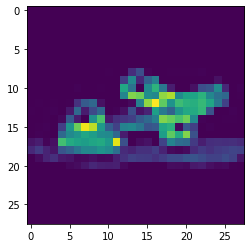

In [9]:
plt.imshow(training[4043, 1:].reshape(28,28))

In [10]:
#Model training

In [11]:
#Neural Network - CNN

# Since each pixel in image need to be independant we can't use them on the neural netowrk directly, we need to convolute the
# available image pixels
# the process before input to neural network would be to run through convolution layer(feature detector), pool the o/p (downsampling)
# flatten the o/p and feed to neural network

# convolution use kernal matrix for scan image and extract feature. Kernals are used in machine learning for feature detection
# Convolution preserves spatial relationship between pixels

# feature detection runs matrix and perform mathematical operation on each pixel based on type (blur, sharp) and assign 
# value for each o/p pixel based on feature map 

# RELU layers are added for non linearity in feature maps, improves sparsity/ scattered feature map covering all aspects
# RELU minimises the oscillation in values present in matrix eg. like removing negative numbers to 0 in feature map

# Pooling reduces the size of image preserving the features eg. 4x4 into 2x2 with features
# pooling reduce feature map dimension and also generalizes the model

In [15]:
X_train = training[:, 1:]/255 # -> /255 to normolize
y_train = training[:, 0]

X_test = test[:, 1:]/255
y_test = test[:, 0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2)

In [19]:
# Since the data set is flattened, we need to reshape before input to CNN

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [51]:
cnn_model = Sequential()

In [52]:
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation = 'relu'))   # conv2d(no.of feature, shape, shape, input_shape....)

In [53]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2))) # -> reduced size

In [54]:
cnn_model.add(Flatten())

In [55]:
cnn_model.add(Dense(units = 32, activation = 'relu'))   # hidden layer with 32 outputs
cnn_model.add(Dense(units = 10, activation = 'sigmoid')) # 10 output class and sigmoid for output definition

In [56]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [57]:
cnn_model.fit(X_train, y_train, batch_size=512, epochs = 50, verbose=1,
             validation_data= (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 15ms/step - loss: 1.8301 - accuracy: 0.3725 - val_loss: 0.7521 - val_accuracy: 0.7259
Epoch 2/50
94/94 [==============================] - 1s 13ms/step - loss: 0.6892 - accuracy: 0.7519 - val_loss: 0.6081 - val_accuracy: 0.7797
Epoch 3/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5849 - accuracy: 0.7859 - val_loss: 0.5451 - val_accuracy: 0.8042
Epoch 4/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5356 - accuracy: 0.8051 - val_loss: 0.5304 - val_accuracy: 0.8033
Epoch 5/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5033 - accuracy: 0.8177 - val_loss: 0.4861 - val_accuracy: 0.8227
Epoch 6/50
94/94 [==============================] - 1s 14ms/step - loss: 0.4765 - accuracy: 0.8265 - val_loss: 0.4671 - val_accuracy: 0.8293
Epoch 7/50
94/94 [==============================] - 1s 14ms/step - loss: 0.4567 - accuracy: 0.8361 - val_loss: 0.4573 - val_accuracy: 0.8323
Epoch 8/50
94

In [58]:
## model evaluation

In [59]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("test accuracy: {: .3f}".format(evaluation[1]))

313/313 [==============================] - 0s 729us/step - loss: 0.3372 - accuracy: 0.8765
test accuracy:  0.877


In [60]:
predicted_classes = cnn_model.predict_classes(X_test)

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


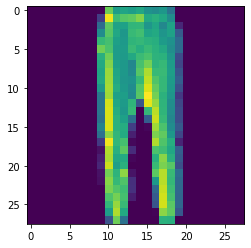

In [61]:
plt.imshow(test[5000, 1:].reshape(28,28))

In [62]:
predicted_classes[5000]

1

In [63]:
test[5000, 0]

1.0

<AxesSubplot:>

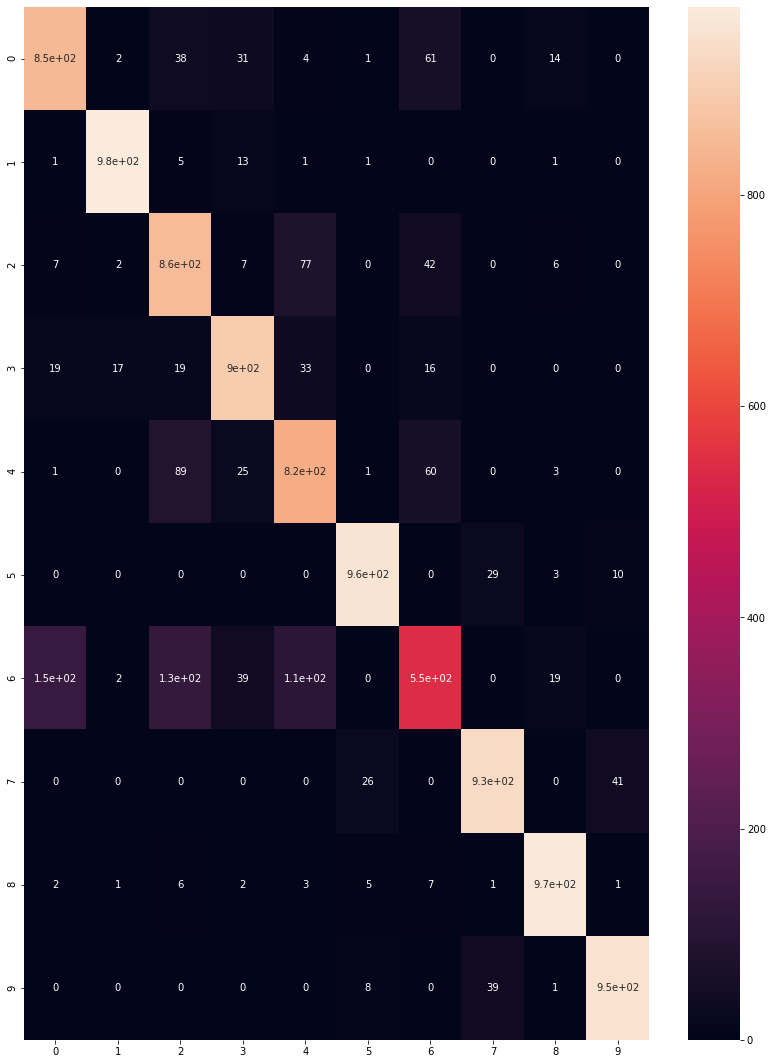

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,19))
sns.heatmap(cm, annot = True)

In [65]:
from sklearn.metrics import classification_report

num_class = 10
target_names = ["Class {}".format(i) for i in range (num_class)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.85      0.84      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.75      0.86      0.80      1000
     Class 3       0.88      0.90      0.89      1000
     Class 4       0.78      0.82      0.80      1000
     Class 5       0.96      0.96      0.96      1000
     Class 6       0.75      0.55      0.63      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

